In [22]:
# rerun if needed
# %pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
data = pd.read_csv('players.csv')
numeric_data = data.select_dtypes(include='number')
# print (data.head())
print(data.columns.tolist())


['season', 'player_id', 'firstname', 'lastname', 'age', 'height', 'weight', 'appearances', 'lineups', 'minutes_played', 'position', 'rating', 'captain', 'substitutions_in', 'substitutions_out', 'bench_appearances', 'total_shots', 'shots_on_target', 'total_goals', 'assists', 'goals_conceded', 'saves', 'total_passes', 'key_passes', 'pass_accuracy', 'total_tackles', 'blocks', 'interceptions', 'total_duels', 'duels_won', 'dribble_attempts', 'successful_dribbles', 'dribbled_past', 'fouls_drawn', 'fouls_committed', 'yellow_cards', 'yellow_red_cards', 'red_cards', 'penalties_won', 'penalties_committed', 'penalties_scored', 'penalties_missed', 'penalties_saved']


In [4]:
# Count the number of missing values in each column
missing_values = data.isnull().sum()
# Filter and print only the columns with missing values greater than zero
non_zero_missing = missing_values[missing_values > 0]
print(non_zero_missing)

age          3
height     316
weight     608
rating    1195
dtype: int64


In [ ]:
# Get the IDs where the rating is NaN
nan_rating_ids = data.loc[data['rating'].isnull(), 'player_id']
print("IDs of players with missing ratings:")
print(nan_rating_ids)

# Get the IDs where the height is NaN
nan_height_ids = data.loc[data['height'].isnull(), 'player_id']
print("\nIDs of players with missing heights:")
print(nan_height_ids)

# Get the IDs where the weight is NaN
nan_weight_ids = data.loc[data['weight'].isnull(), 'player_id']
print("\nIDs of players with missing weights:")
print(nan_weight_ids)

# Get the IDs where the age is NaN
nan_age_ids = data.loc[data['age'].isnull(), 'player_id']
print("\nIDs of players with missing ages:")
print(nan_age_ids)


# List of specific columns to plot   -  trying to find problematic values

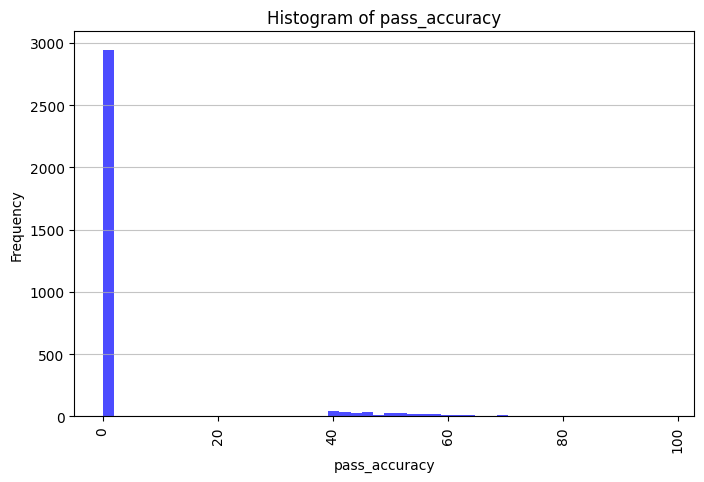

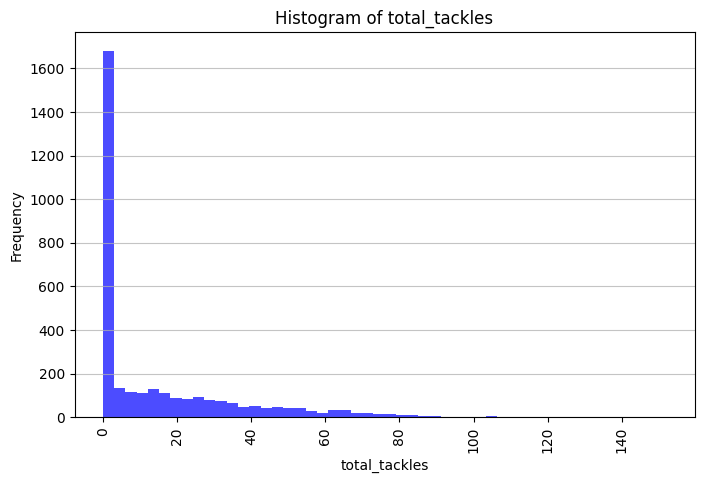

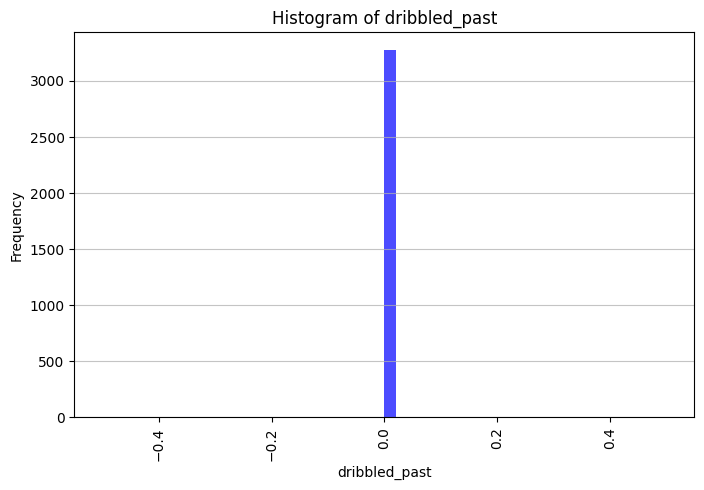

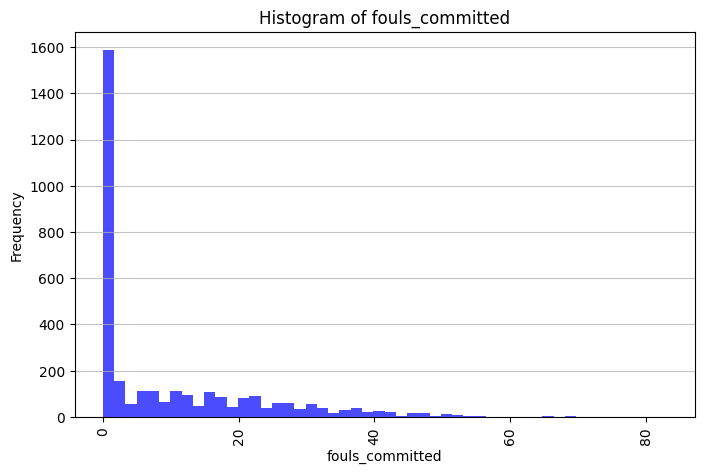

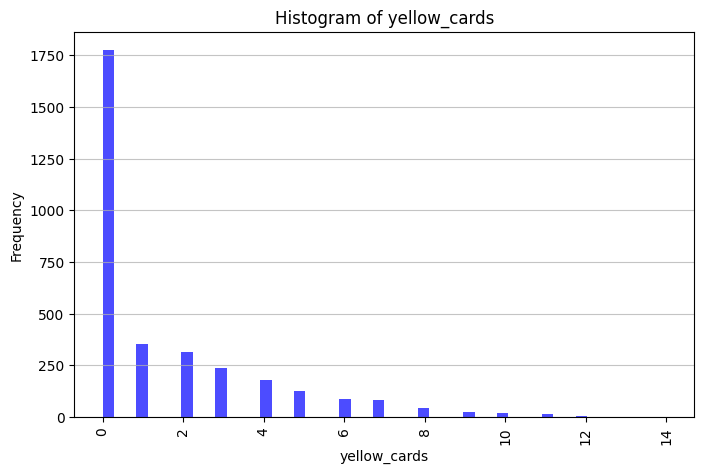

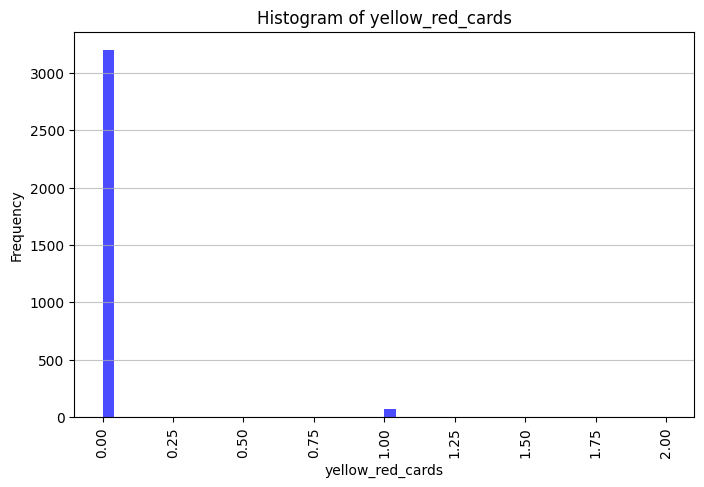

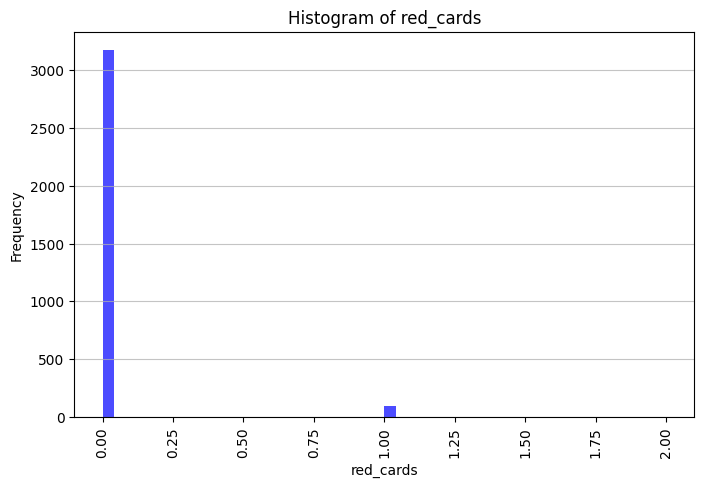

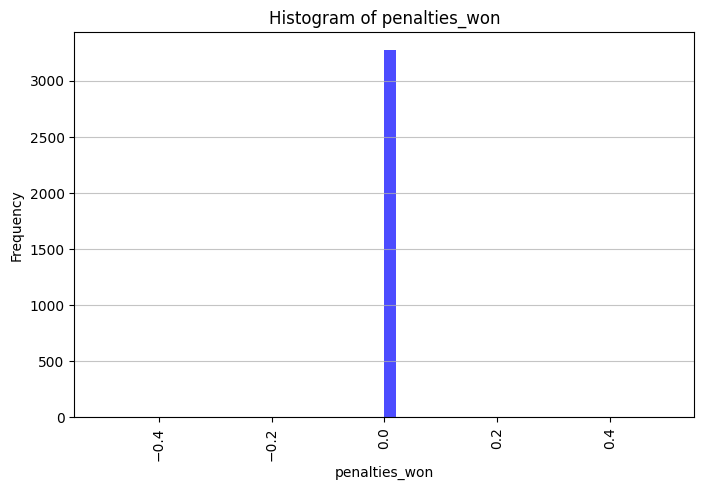

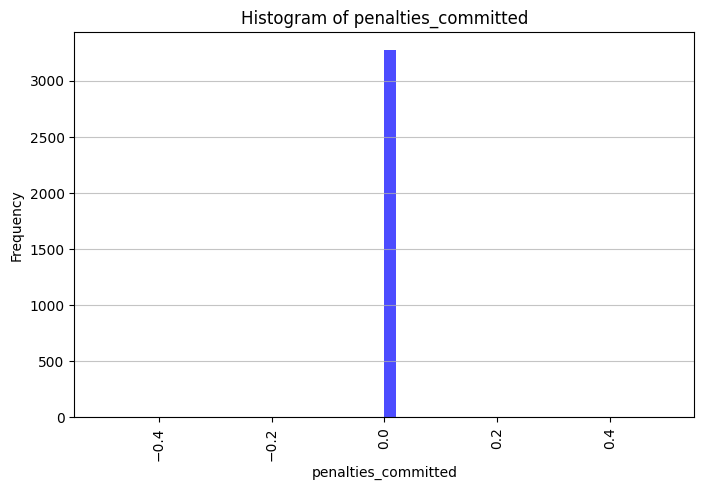

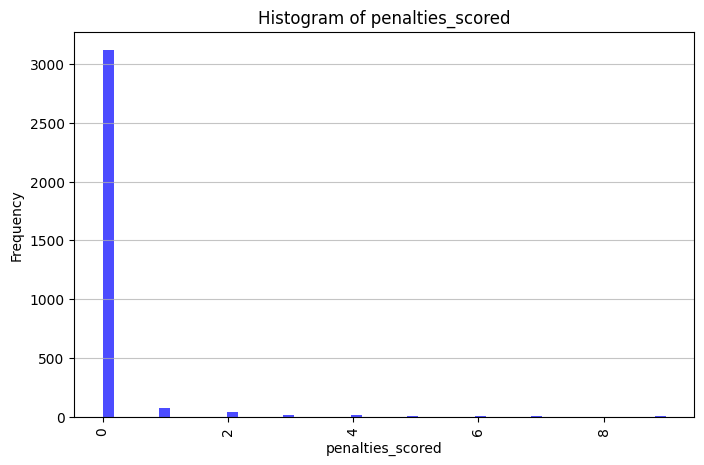

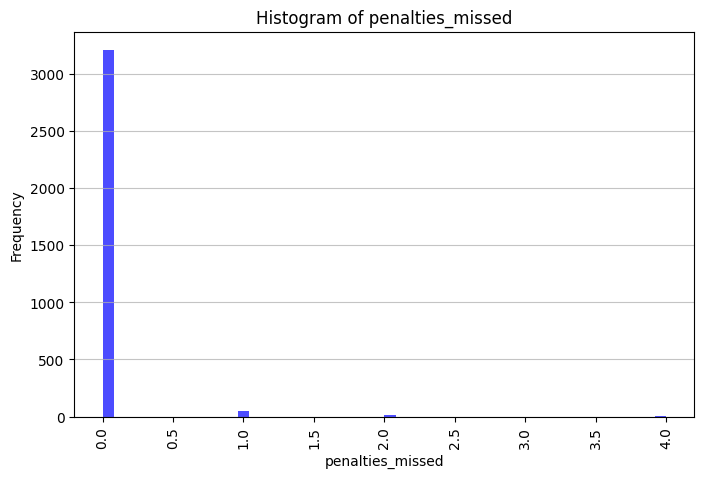

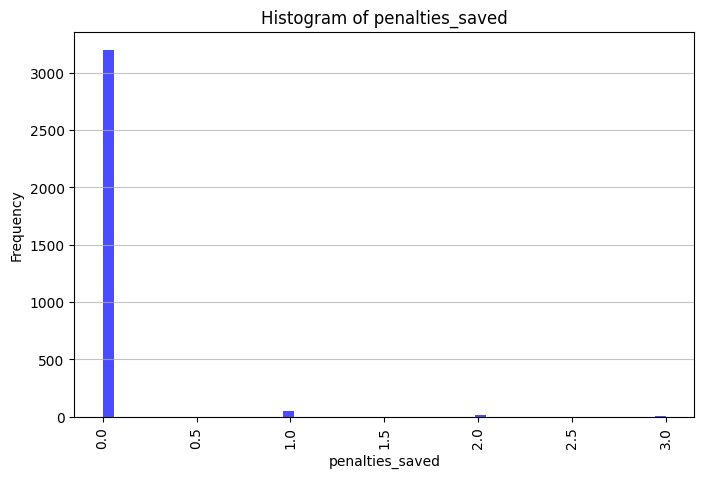

In [39]:
# List of specific columns to plot
columns_to_plot = ['pass_accuracy', 'total_tackles',  'dribbled_past', 'fouls_committed', 'yellow_cards', 'yellow_red_cards', 'red_cards', 'penalties_won', 'penalties_committed', 'penalties_scored', 'penalties_missed', 'penalties_saved']
# all numeric columns:
# ['age', 'height', 'weight', 'appearances', 'lineups', 'minutes_played', 'rating', 'substitutions_in', 'substitutions_out', 'bench_appearances', 'total_shots', 'shots_on_target', 'total_goals', 'assists', 'goals_conceded', 'saves', 'total_passes', 'key_passes', 'pass_accuracy', 'total_tackles', 'blocks', 'interceptions', 'total_duels', 'duels_won', 'dribble_attempts', 'successful_dribbles', 'dribbled_past', 'fouls_drawn', 'fouls_committed', 'yellow_cards', 'yellow_red_cards', 'red_cards', 'penalties_won', 'penalties_committed', 'penalties_scored', 'penalties_missed', 'penalties_saved']
# for now i left up all the data i think i have a problem with and is not right

# before omri think some are ok:
#  ['rating', 'goals_conceded', 'saves', 'total_passes', 'key_passes', 'pass_accuracy', 'total_tackles', 'blocks', 'interceptions', 'total_duels', 'duels_won', 'dribble_attempts', 'successful_dribbles', 'dribbled_past', 'fouls_drawn', 'fouls_committed', 'yellow_cards', 'yellow_red_cards', 'red_cards', 'penalties_won', 'penalties_committed', 'penalties_scored', 'penalties_missed', 'penalties_saved']

# before fixing each plot after omri review:
# ['rating', 'goals_conceded', 'saves', 'pass_accuracy', 'total_tackles',  'dribbled_past', 'fouls_committed', 'yellow_cards', 'yellow_red_cards', 'red_cards', 'penalties_won', 'penalties_committed', 'penalties_scored', 'penalties_missed', 'penalties_saved']

for column in columns_to_plot:
    plt.figure(figsize=(8, 5))
    plt.hist(data[column].dropna(), bins=50, alpha=0.7, color='blue')  # Drop NaN values
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)  # Rotate x-axis labels
    plt.grid(axis='y', alpha=0.75)
    plt.show()

# # Plot histograms for the specified columns
# data[columns_to_plot].hist(figsize=(15, 10))  # Adjust figsize as needed
# plt.tight_layout()
# plt.show()



### check players raiting + appearences

In [ ]:
# Filter for players with 0 appearances, and 0 other stuff
players_zero_appearances = data[data['appearances'] == 0]
print("Number of players with 0 appearances" ,len(players_zero_appearances))

# Additional filter for players with NaN rating (regardless of appearances)
players_with_nan_rating = data[data['rating'].isna()]
print("Total number of players with NaN rating:", len(players_with_nan_rating))

players_zero_appearances = data[(data['appearances'] == 0) & (data['rating'].isna())]
print("Number of players with 0 appearances and NaN rating:", len(players_zero_appearances))

players_zero_appearances = data[(data['appearances'] == 0) & (~data['rating'].isna())]
print("Number of players with 0 appearances and non-NaN rating:", len(players_zero_appearances))


Number of players with 0 appearances 1176
Total number of players with NaN rating: 1195
Number of players with 0 appearances and NaN rating: 1151
Number of players with 0 appearances and non-NaN rating: 25


### Filter for Goalkeepers with Goals Conceded


In [ ]:
# filter for goalkeapers + goals_conceded 
goalkeepers = data[data['position'] == 'Goalkeeper']

# Filter for all goalkeepers
all_goalkeepers = data[data['position'] == 'Goalkeeper']
num_all_goalkeepers = len(all_goalkeepers)
print("Total number of goalkeepers:", num_all_goalkeepers)

# Plotting the number of goals conceded by each goalkeeper (all goalkeepers)
plt.figure(figsize=(12, 20))
plt.barh(all_goalkeepers['firstname'] + ' ' + all_goalkeepers['lastname'], all_goalkeepers['goals_conceded'])
plt.ylabel('Goalkeepers')
plt.xlabel('Goals Conceded')
plt.title(f'Number of Goals Conceded by Each Goalkeeper (Total: {num_all_goalkeepers})')
plt.tight_layout()
plt.show()

# Filter for goalkeepers who have played games (appearances > 0)
goalkeepers_played = data[(data['position'] == 'Goalkeeper') & (data['appearances'] > 0)]
num_goalkeepers_played = len(goalkeepers_played)
print("Number of goalkeepers who played games:", num_goalkeepers_played)

# Plotting the number of goals conceded by each goalkeeper who played games
plt.figure(figsize=(12, 20))
plt.barh(goalkeepers_played['firstname'] + ' ' + goalkeepers_played['lastname'], goalkeepers_played['goals_conceded'])
plt.ylabel('Goalkeepers')
plt.xlabel('Goals Conceded')
plt.title(f'Number of Goals Conceded by Each Goalkeeper Who Played Games (Total: {num_goalkeepers_played})')
plt.tight_layout()
plt.show()

### Filter for Goalkeepers with saves


In [ ]:
# Filter for all goalkeepers + saves
all_goalkeepers = data[data['position'] == 'Goalkeeper']
num_all_goalkeepers = len(all_goalkeepers)
print("Total number of goalkeepers:", num_all_goalkeepers)

# Plotting the number of saves by each goalkeeper (all goalkeepers)
plt.figure(figsize=(12, 20))
plt.barh(all_goalkeepers['firstname'] + ' ' + all_goalkeepers['lastname'], all_goalkeepers['saves'])
plt.ylabel('Goalkeepers')
plt.xlabel('Saves')
plt.title(f'Number of Saves by Each Goalkeeper (Total: {num_all_goalkeepers})')
plt.tight_layout()
plt.show()

# Filter for goalkeepers who have played games (appearances > 0)
goalkeepers_played = data[(data['position'] == 'Goalkeeper') & (data['appearances'] > 0)]
num_goalkeepers_played = len(goalkeepers_played)
print("Number of goalkeepers who played games:", num_goalkeepers_played)

# Plotting the number of saves by each goalkeeper who played games
plt.figure(figsize=(12, 20))
plt.barh(goalkeepers_played['firstname'] + ' ' + goalkeepers_played['lastname'], goalkeepers_played['saves'])
plt.ylabel('Goalkeepers')
plt.xlabel('Saves')
plt.title(f'Number of Saves by Each Goalkeeper Who Played Games (Total: {num_goalkeepers_played})')
plt.tight_layout()
plt.show()

# heatmap + corelations

In [ ]:
# heatmap
plt.figure(figsize=(50,50))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()